# Description

Training an image classifier using FastAI on the Oxford IIIT dataset

In [1]:
#This code is only here to check that your internet is enabled. It doesn't do anything else.

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")
     

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.

!pip install -Uqq fastai

# 1. Analyse the dataset

In [3]:
!pwd

/kaggle/working


In [6]:
!ls /kaggle/input

the-oxfordiiit-pet-dataset


In [3]:
!ls /kaggle/input/the-oxfordiiit-pet-dataset/images/ | wc -l

7394


In [4]:
import os

input_img_dir = '/kaggle/input/the-oxfordiiit-pet-dataset/images/'

input_img_files = os.listdir(input_img_dir)
input_img_paths = [os.path.join(input_img_dir, f) for f in input_img_files]

In [5]:
input_img_paths[0]

'/kaggle/input/the-oxfordiiit-pet-dataset/images/american_pit_bull_terrier_16.jpg'

Check possible suffixes

In [6]:
set([f.split('.')[-1] for f in input_img_paths])

{'/kaggle/input/the-oxfordiiit-pet-dataset/images/images', 'jpg', 'mat'}

Take only jpg

In [7]:
input_img_paths_fil = [f for f in input_img_paths if f[-3:]=='jpg']
len(input_img_paths_fil)

7390

In [8]:
set([f.split('.')[-1] for f in input_img_paths_fil])

{'jpg'}

Analyse prefixes to get classes

In [9]:
input_img_paths_fil[0]

'/kaggle/input/the-oxfordiiit-pet-dataset/images/american_pit_bull_terrier_16.jpg'

In [10]:
classes = set([' '.join(f.split('/')[-1].split('_')[:-1]).lower() for f in input_img_paths_fil])
len(classes)

37

In [24]:
classes

{'abyssinian',
 'american bulldog',
 'american pit bull terrier',
 'basset hound',
 'beagle',
 'bengal',
 'birman',
 'bombay',
 'boxer',
 'british shorthair',
 'chihuahua',
 'egyptian mau',
 'english cocker spaniel',
 'english setter',
 'german shorthaired',
 'great pyrenees',
 'havanese',
 'japanese chin',
 'keeshond',
 'leonberger',
 'maine coon',
 'miniature pinscher',
 'newfoundland',
 'persian',
 'pomeranian',
 'pug',
 'ragdoll',
 'russian blue',
 'saint bernard',
 'samoyed',
 'scottish terrier',
 'shiba inu',
 'siamese',
 'sphynx',
 'staffordshire bull terrier',
 'wheaten terrier',
 'yorkshire terrier'}

# Step 2: Arrange the dataset as per the format needed

In [11]:
!pwd

/kaggle/working


In [12]:
input_img_dir

'/kaggle/input/the-oxfordiiit-pet-dataset/images/'

In [13]:
from fastcore.all import *
import shutil

path = Path('pets')

In [14]:
if not path.exists():
    path.mkdir()
    for o in classes:
        dest = (path/o)
        dest.mkdir(exist_ok=True)

In [15]:
for source_path in input_img_paths_fil:
    dest_class = ' '.join(source_path.split('/')[-1].split('_')[:-1]).lower()
    file_name = os.path.basename(source_path)
    dest_path = os.path.join('pets', dest_class, file_name)
    shutil.copy(source_path, dest_path)

In [16]:
from fastai.vision.all import *
fns = get_image_files(path)
fns

(#7390) [Path('pets/boxer/boxer_87.jpg'),Path('pets/boxer/boxer_43.jpg'),Path('pets/boxer/boxer_128.jpg'),Path('pets/boxer/boxer_16.jpg'),Path('pets/boxer/boxer_64.jpg'),Path('pets/boxer/boxer_23.jpg'),Path('pets/boxer/boxer_163.jpg'),Path('pets/boxer/boxer_185.jpg'),Path('pets/boxer/boxer_101.jpg'),Path('pets/boxer/boxer_11.jpg')...]

In [17]:
for o in classes:
    class_path = path/o
    print(o, len(get_image_files(class_path)))

great pyrenees 200
english cocker spaniel 200
persian 200
leonberger 200
maine coon 200
british shorthair 200
bengal 200
pomeranian 200
chihuahua 200
abyssinian 200
miniature pinscher 200
pug 200
german shorthaired 200
newfoundland 200
beagle 200
staffordshire bull terrier 191
basset hound 200
boxer 200
sphynx 200
siamese 200
wheaten terrier 200
american pit bull terrier 200
scottish terrier 199
american bulldog 200
birman 200
japanese chin 200
shiba inu 200
bombay 200
keeshond 200
english setter 200
russian blue 200
ragdoll 200
havanese 200
samoyed 200
yorkshire terrier 200
egyptian mau 200
saint bernard 200


In [18]:
failed = verify_images(fns)
failed
     

(#0) []

# Step 3: Create dataloader for training

First train without any augmentations resize to 128 * 128

In [39]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


dls = pets.dataloaders(path)

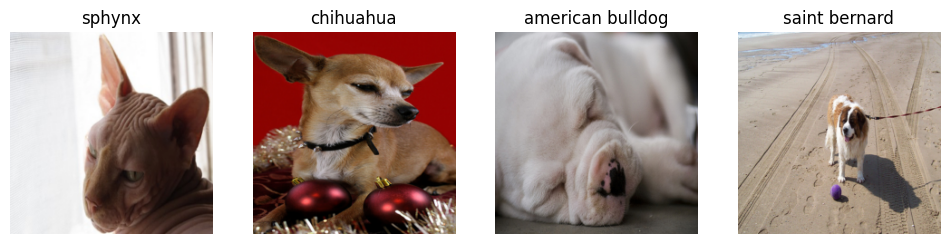

In [68]:
dls.valid.show_batch(max_n=4, nrows=1)

# Step 4: Train the model

Default model: `resnet18`

Default lr: 0.001

In [28]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


dls = pets.dataloaders(path)

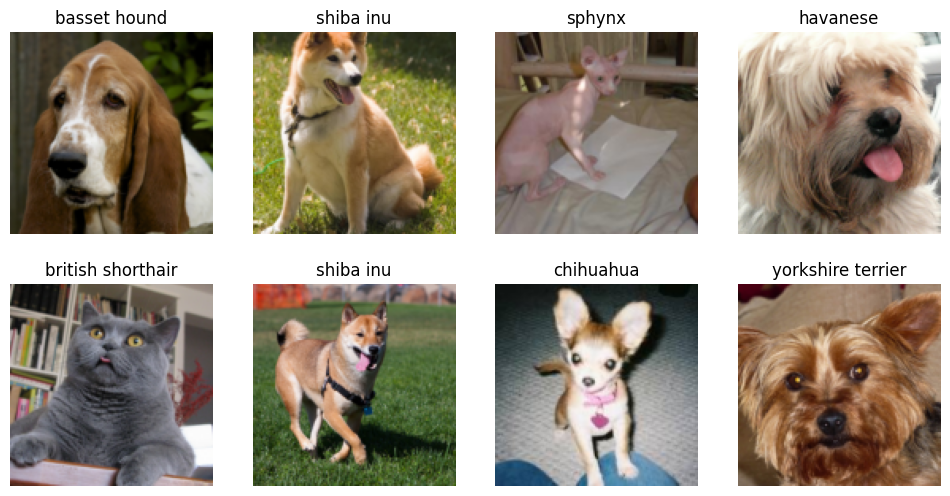

In [29]:
dls.valid.show_batch(max_n=8, nrows=2)

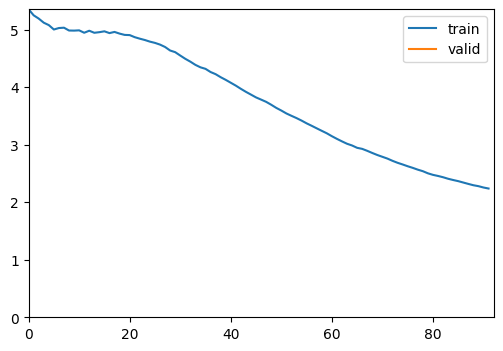

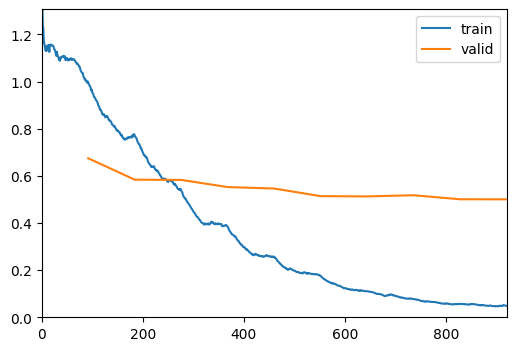

In [30]:
learn = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback())
learn.fine_tune(10)

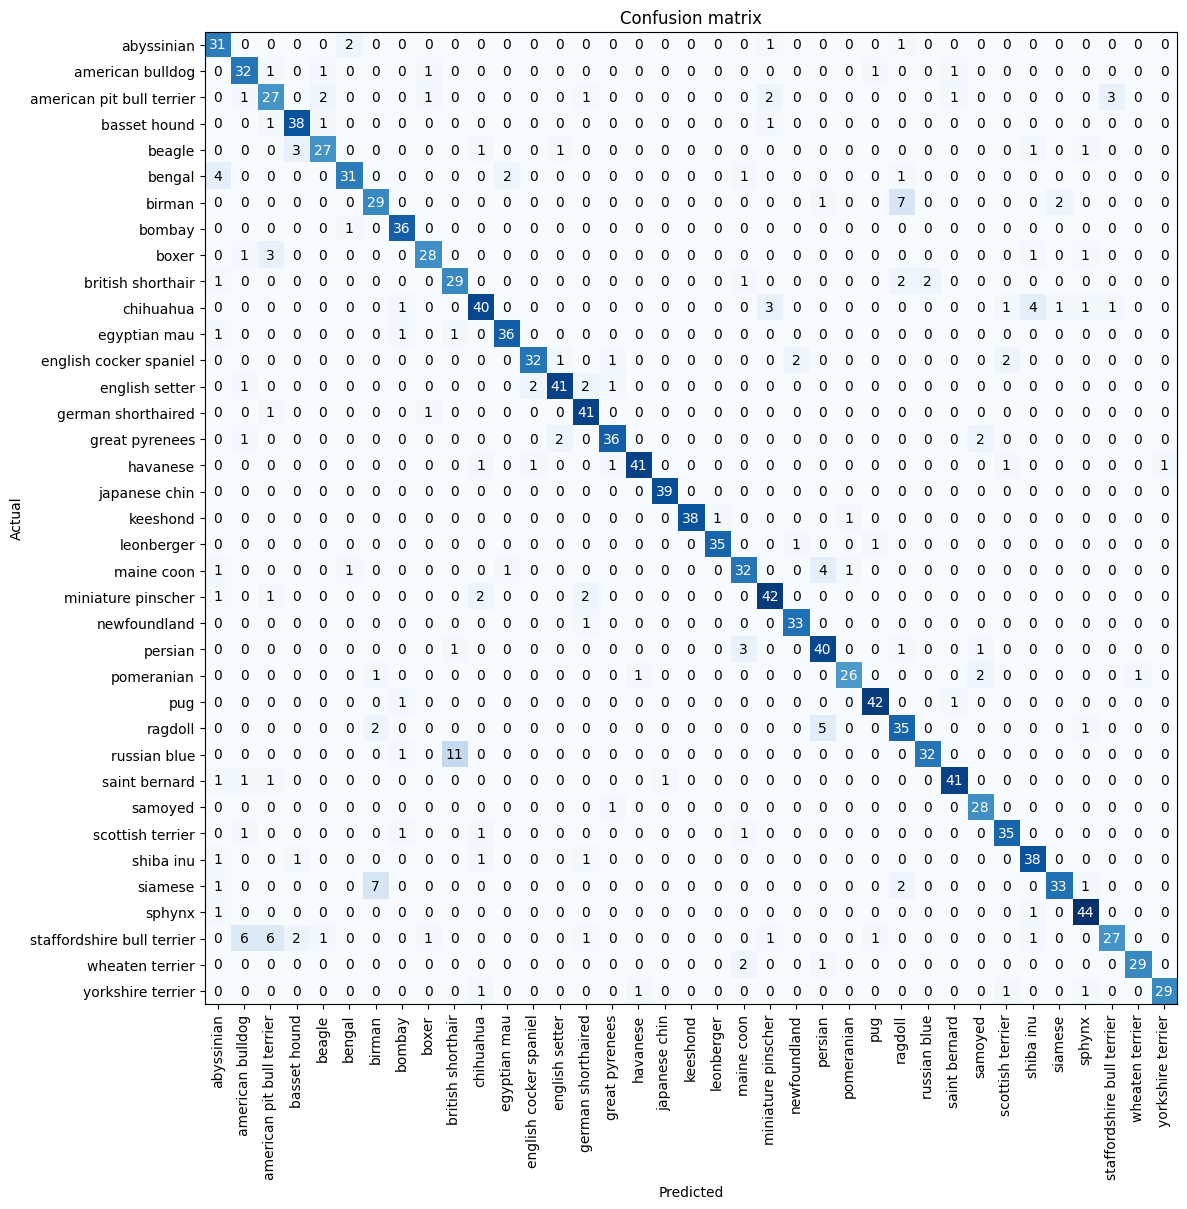

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

In [32]:
interp.print_classification_report()

                            precision    recall  f1-score   support

                abyssinian       0.72      0.89      0.79        35
          american bulldog       0.73      0.86      0.79        37
 american pit bull terrier       0.66      0.71      0.68        38
              basset hound       0.86      0.93      0.89        41
                    beagle       0.84      0.79      0.82        34
                    bengal       0.89      0.79      0.84        39
                    birman       0.74      0.74      0.74        39
                    bombay       0.88      0.97      0.92        37
                     boxer       0.88      0.82      0.85        34
         british shorthair       0.69      0.83      0.75        35
                 chihuahua       0.85      0.77      0.81        52
              egyptian mau       0.92      0.92      0.92        39
    english cocker spaniel       0.91      0.84      0.88        38
            english setter       0.91      0.87

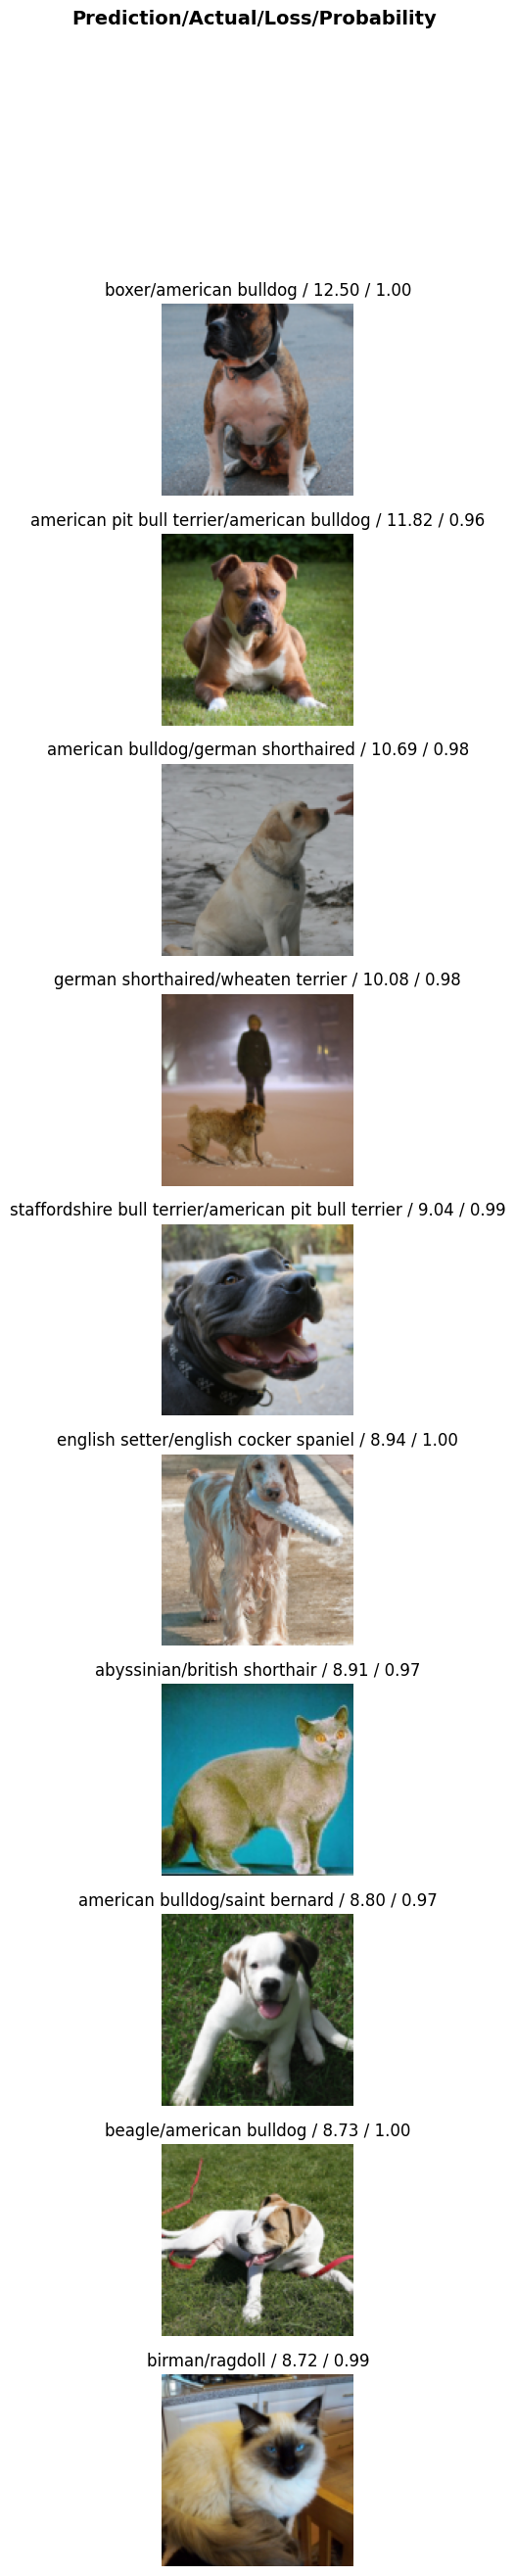

In [79]:
interp.plot_top_losses(10, nrows=10)

## Try lower lrs

lr = 0.0005

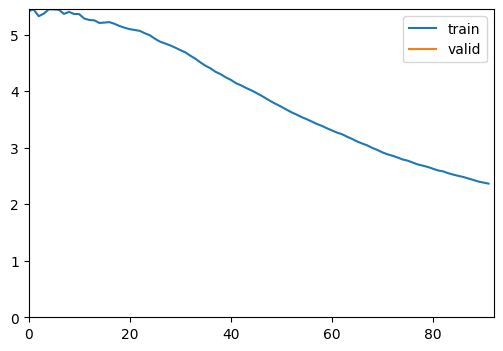

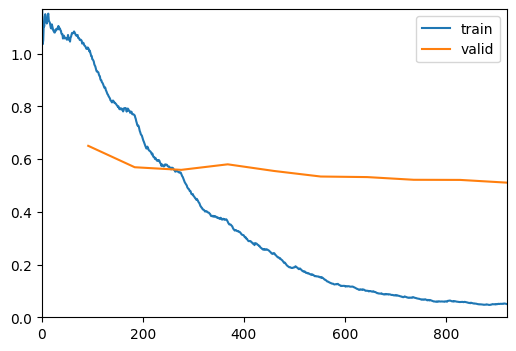

In [56]:
learn1 = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback(), lr=5e-4)
learn1.fine_tune(10)

In [57]:
del learn1

In [58]:
del learn

lr = 0.0001

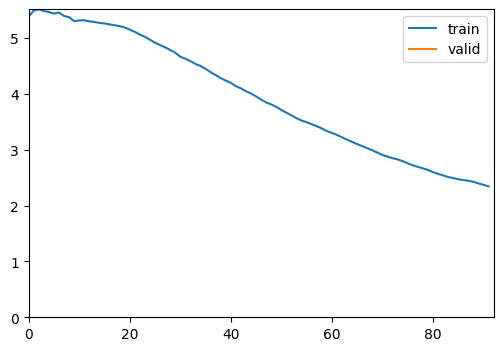

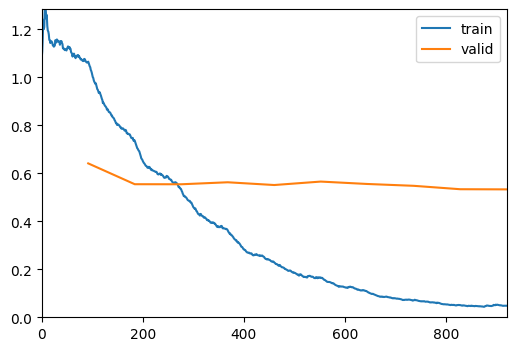

In [59]:
learn1 = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback(), lr=1e-4)
learn1.fine_tune(10)

## Introduce augmentations

Random resized crop

In [80]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = pets.dataloaders(path)

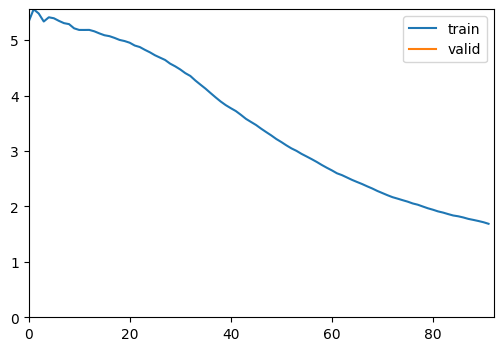

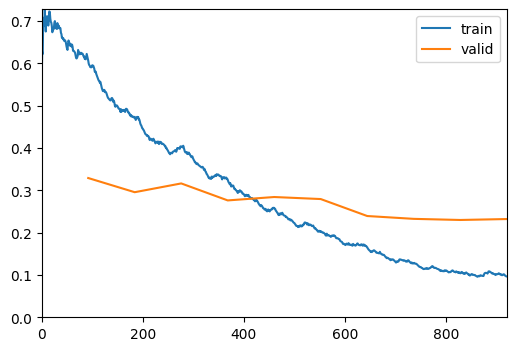

In [81]:
#lr = 0.001
learn = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback())
learn.fine_tune(10)

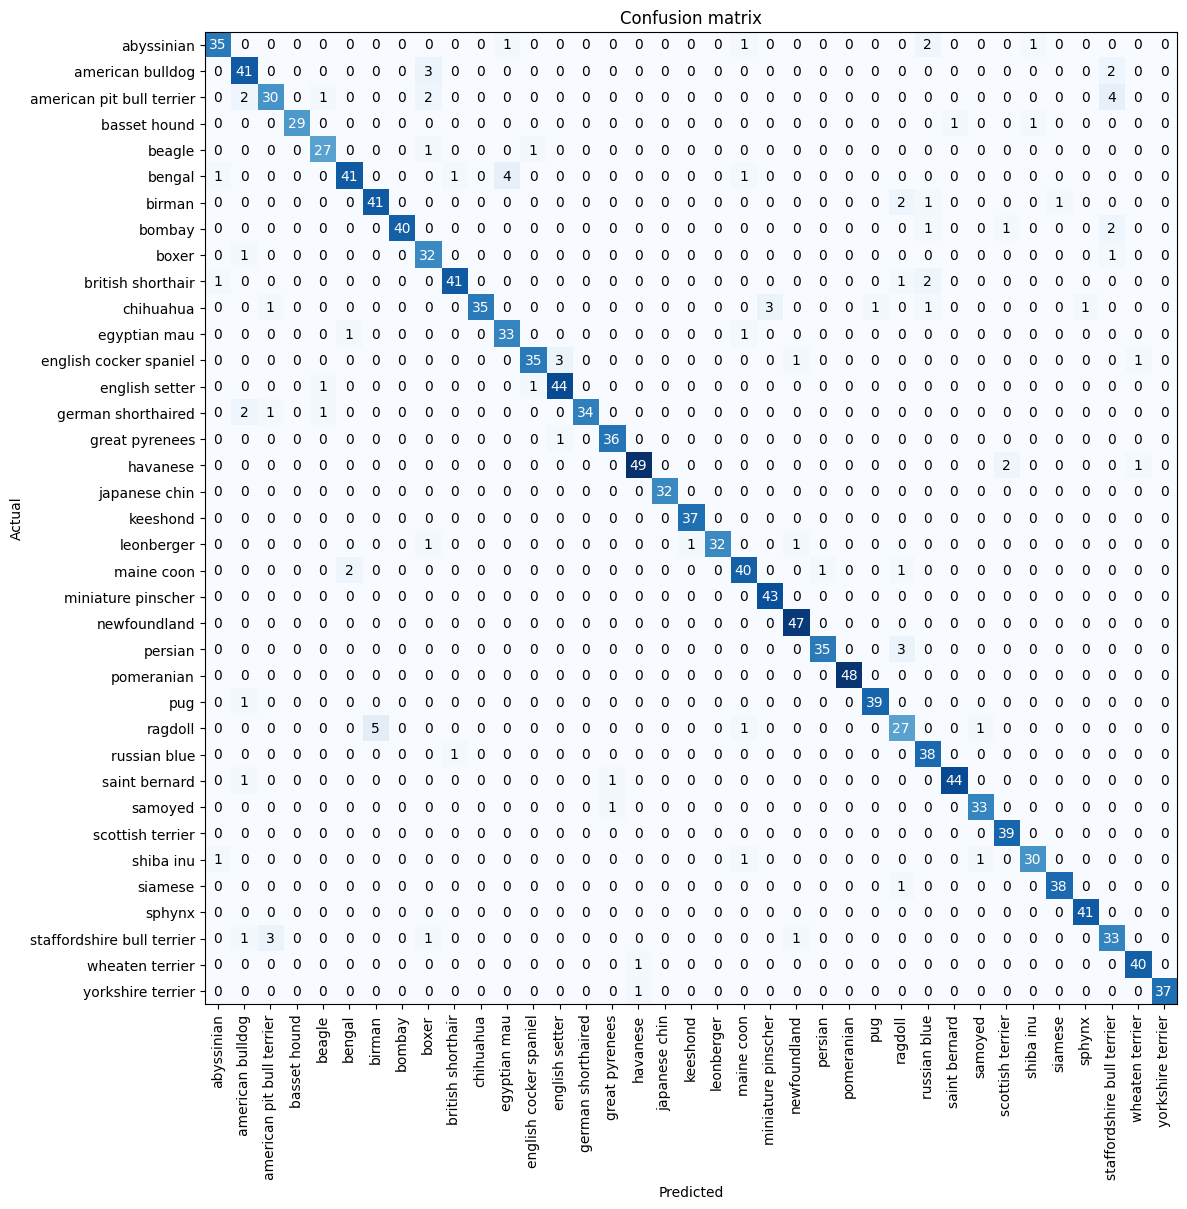

In [82]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

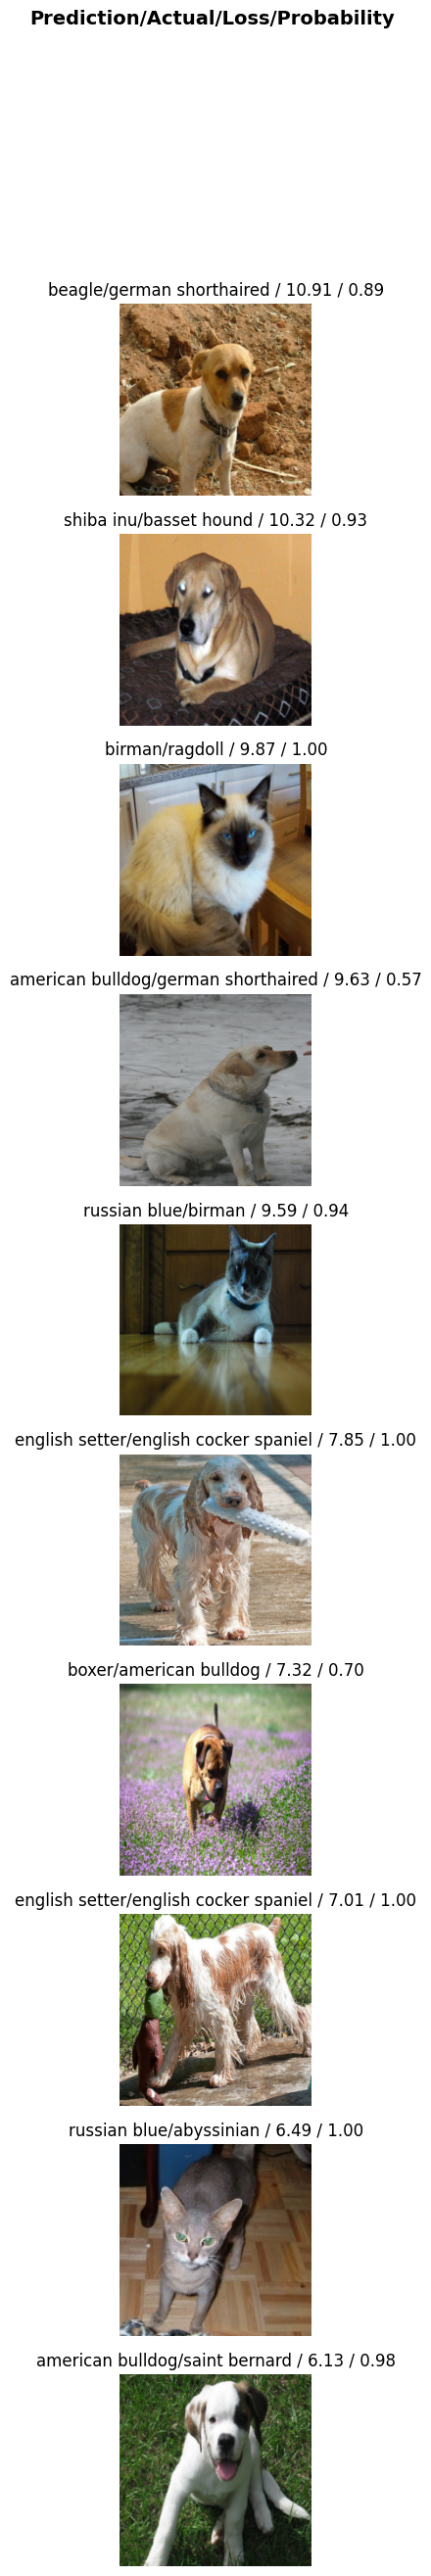

In [84]:
interp.plot_top_losses(10, nrows=10)

Actual augmentations

In [19]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = pets.dataloaders(path)
     

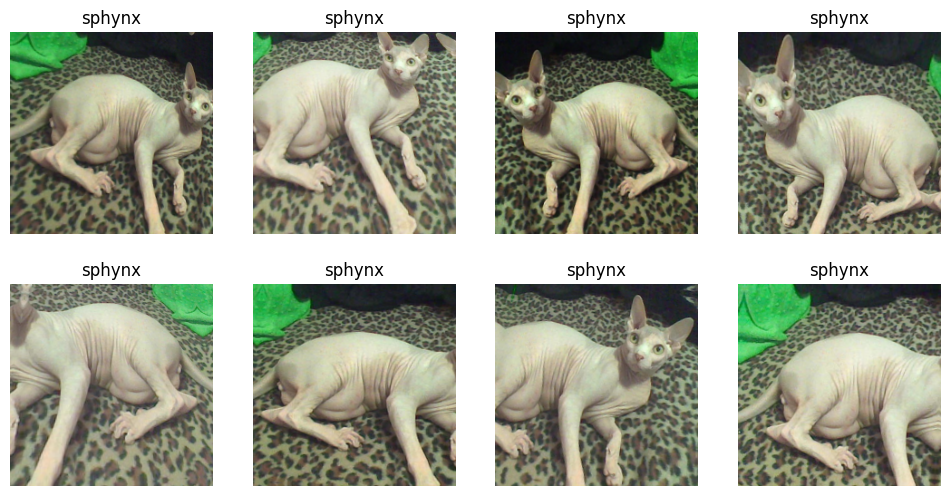

In [20]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 148MB/s]


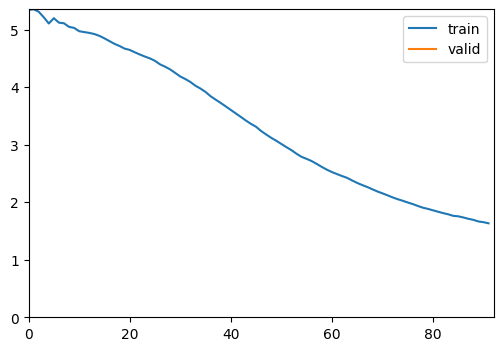

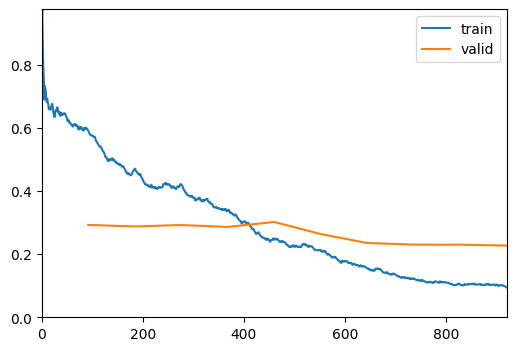

In [21]:
#lr = 0.001
learn = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback())
learn.fine_tune(10)

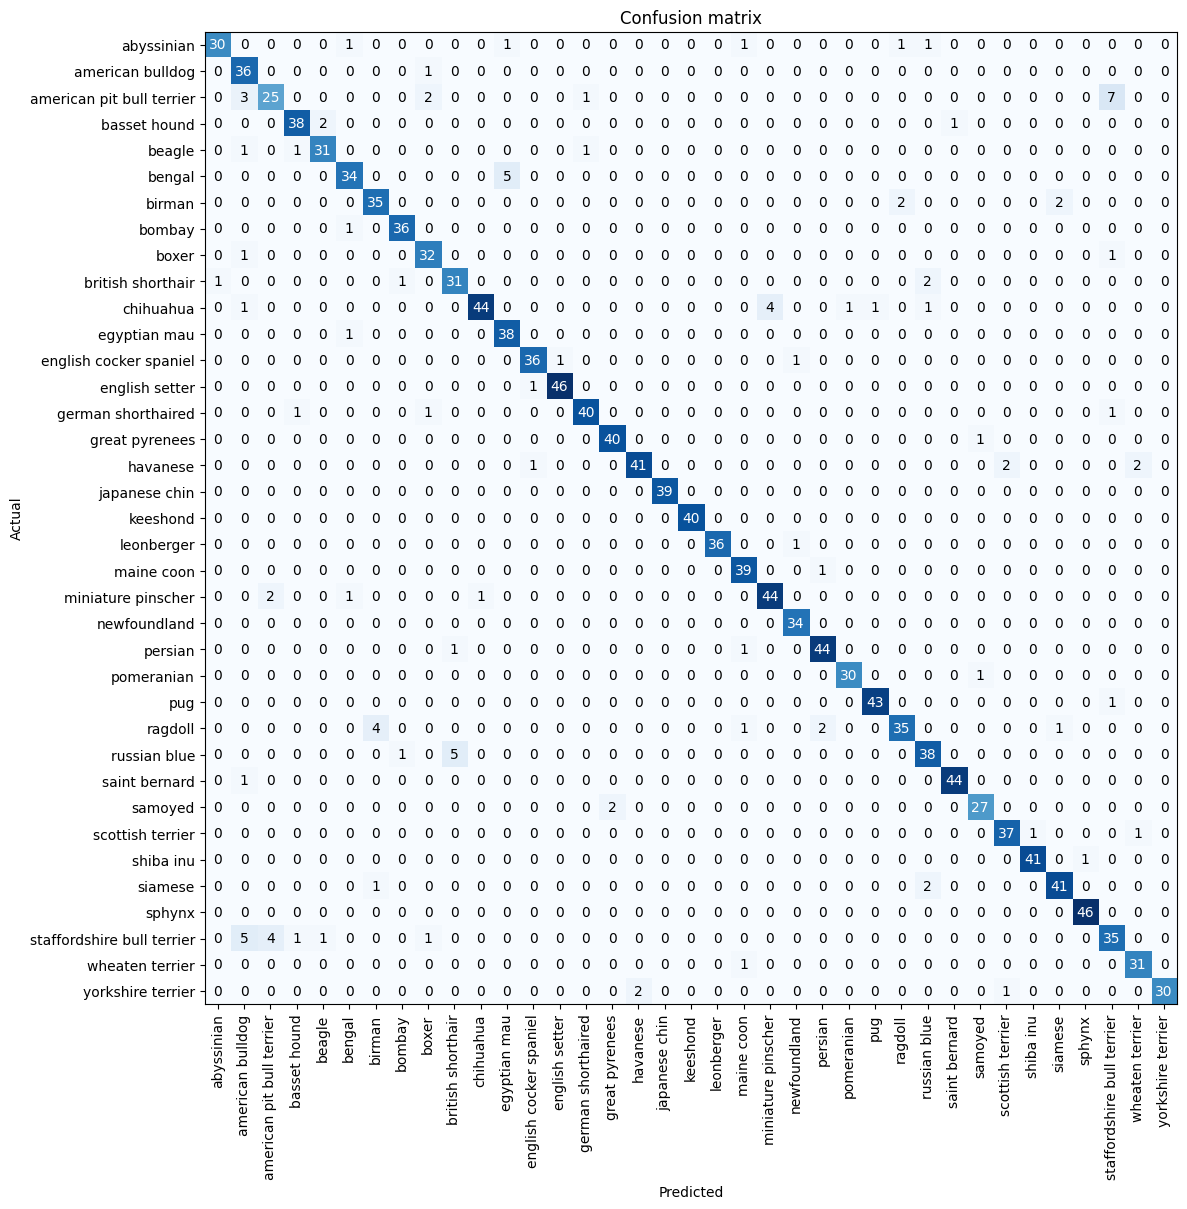

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

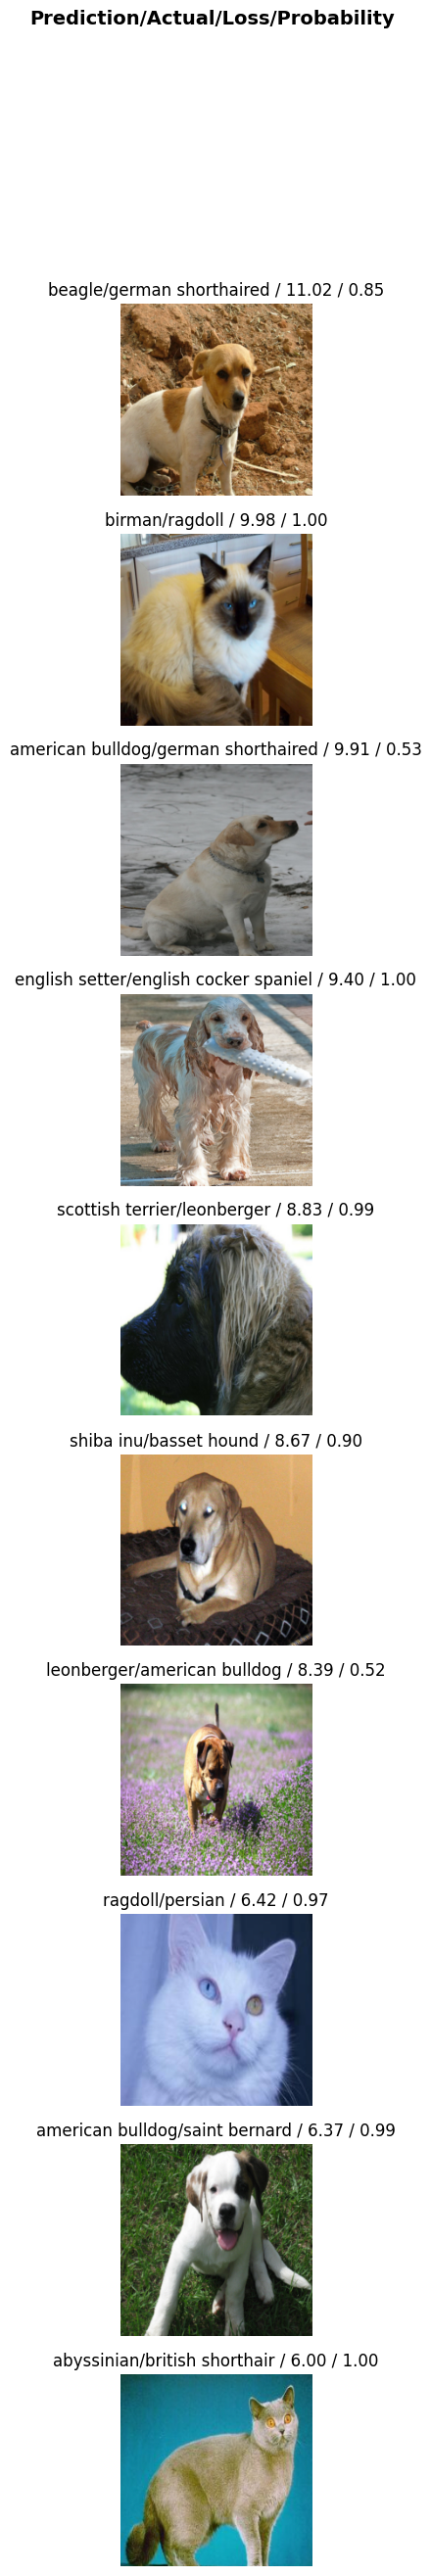

In [89]:
interp.plot_top_losses(10, nrows=10)

Augmentation training looks stable. Lets experiment with lr

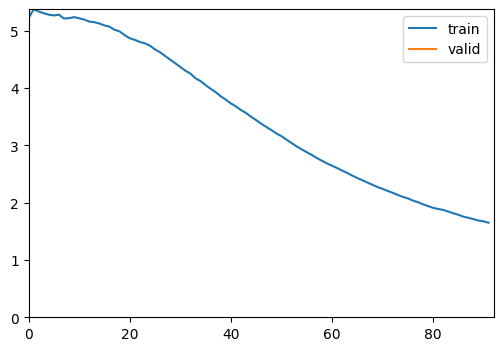

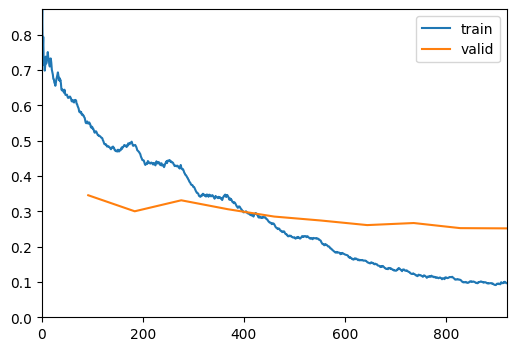

In [90]:
#lr = 0.0005
learn1 = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback(),lr=5e-4)
learn1.fine_tune(10)

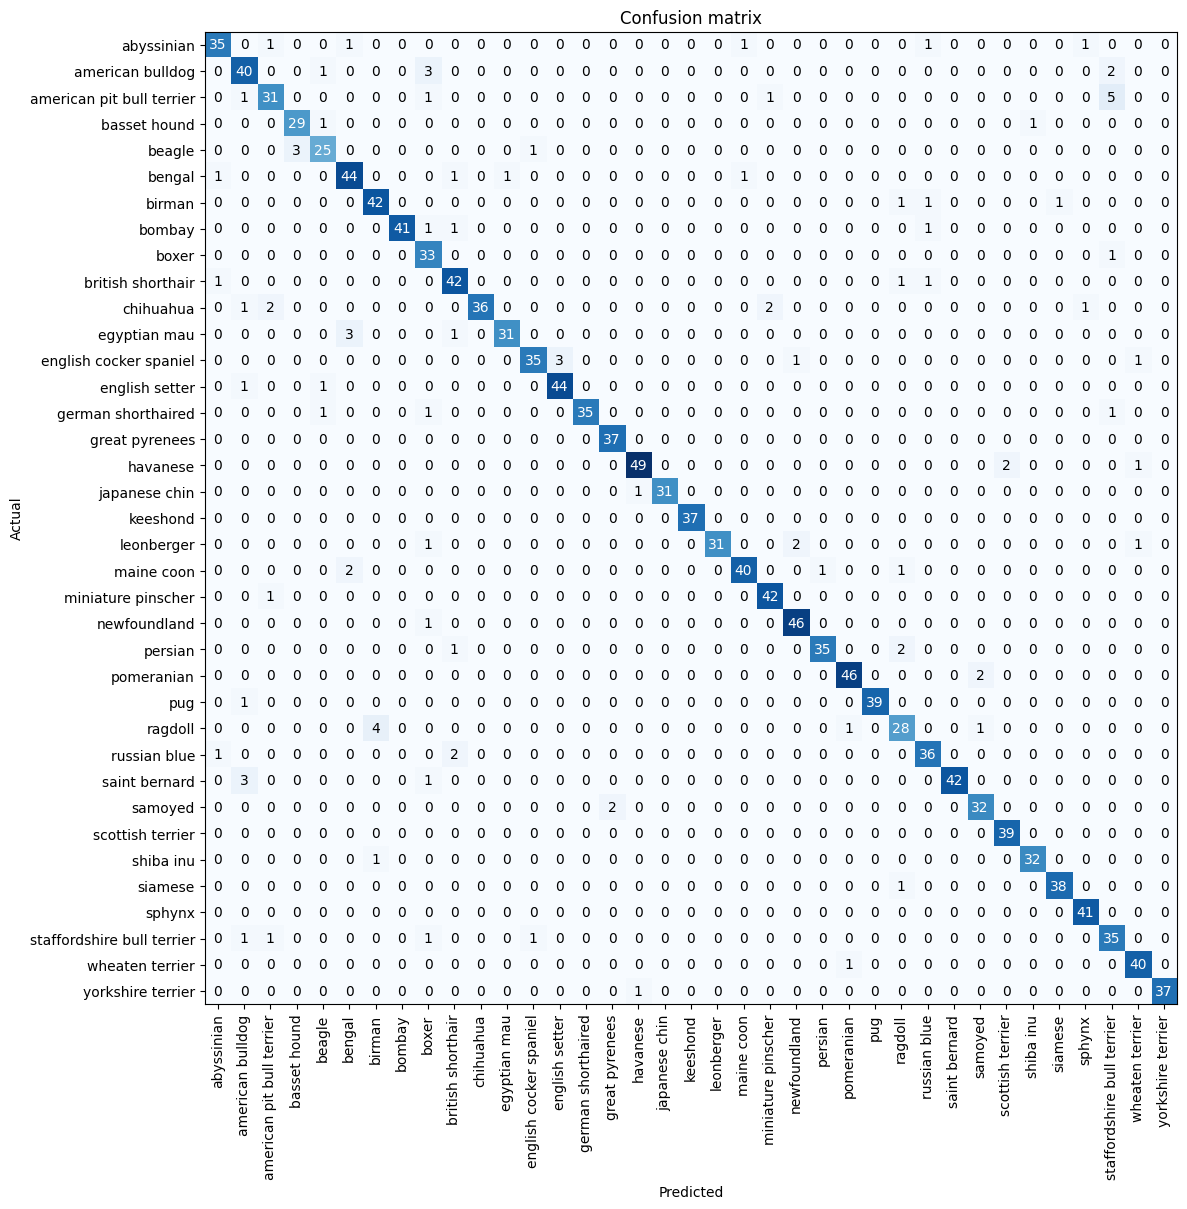

In [91]:
interp1 = ClassificationInterpretation.from_learner(learn1)
interp1.plot_confusion_matrix(figsize=(12, 12))

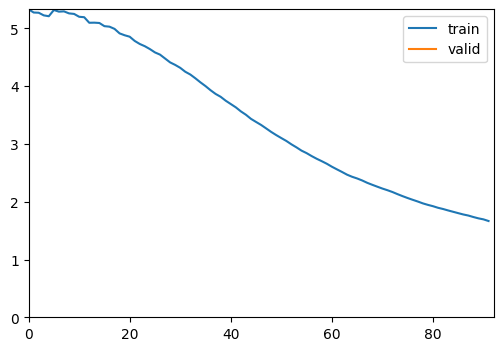

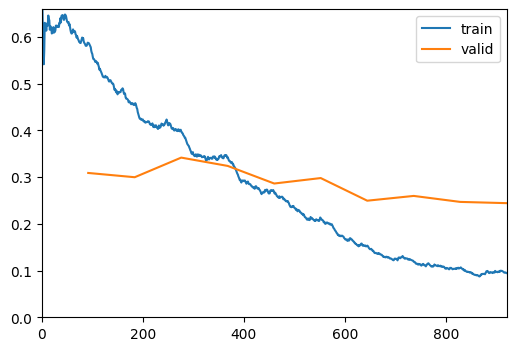

In [92]:
#lr = 0.0002
learn2 = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback(),lr=2e-4)
learn2.fine_tune(10)

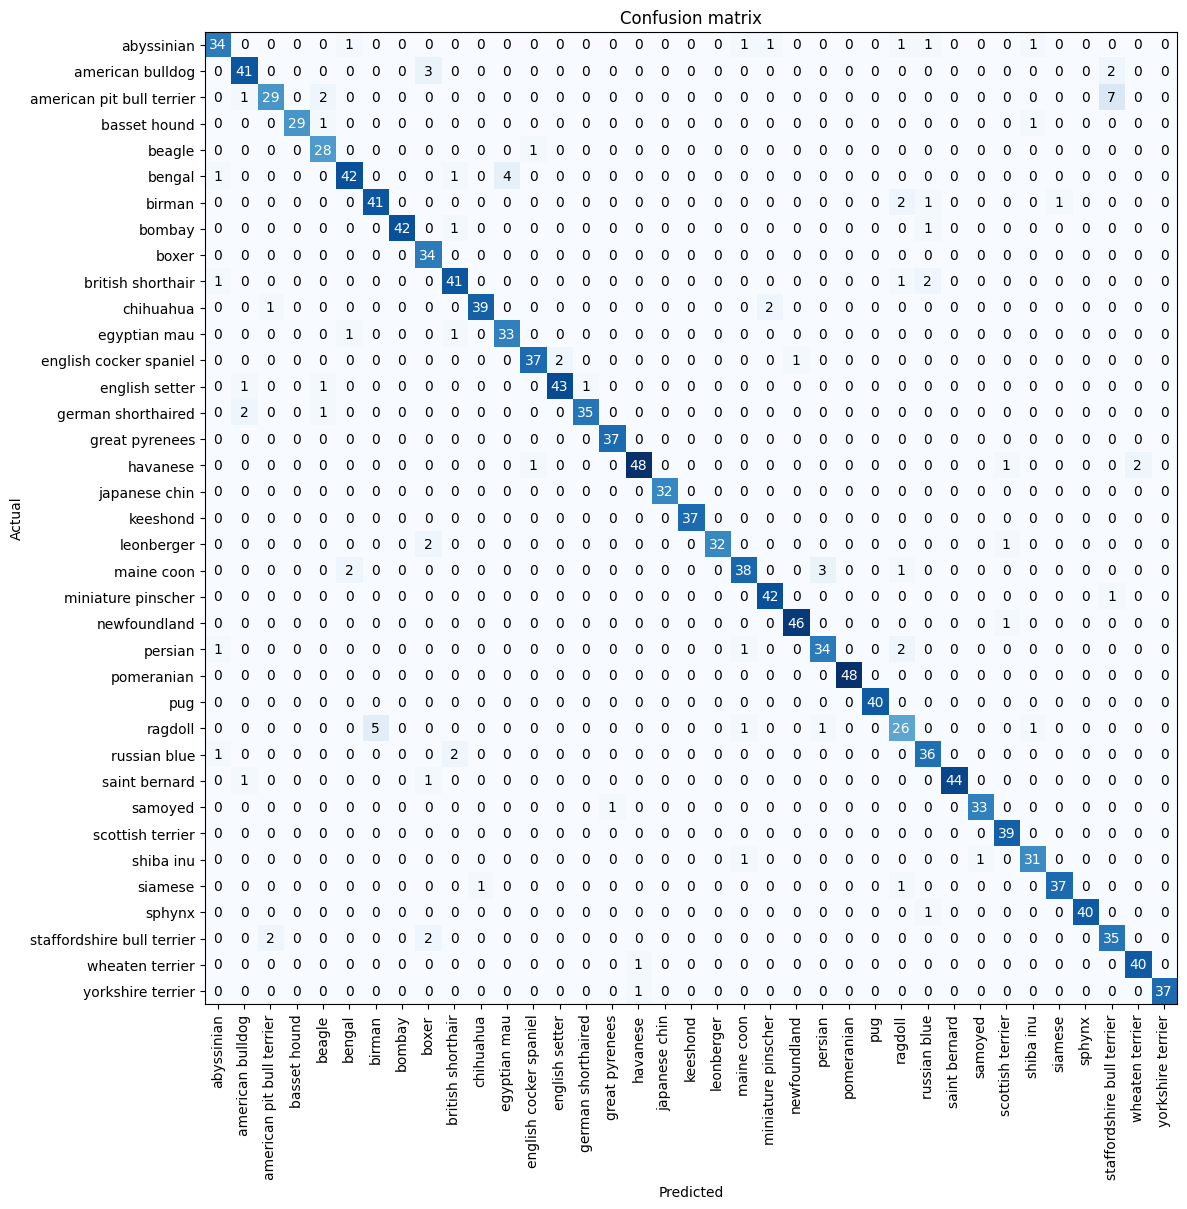

In [93]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix(figsize=(12, 12))

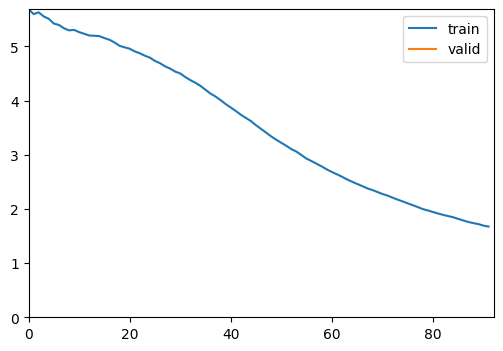

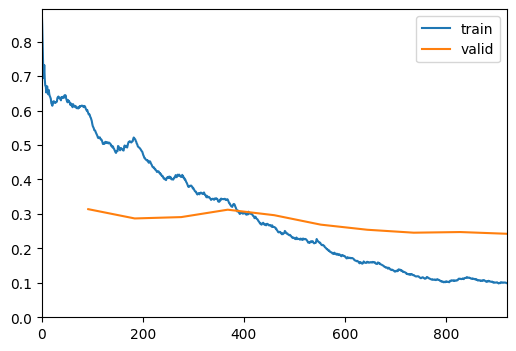

In [94]:
#lr = 0.0001
learn3 = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback(),lr=1e-4)
learn3.fine_tune(10)

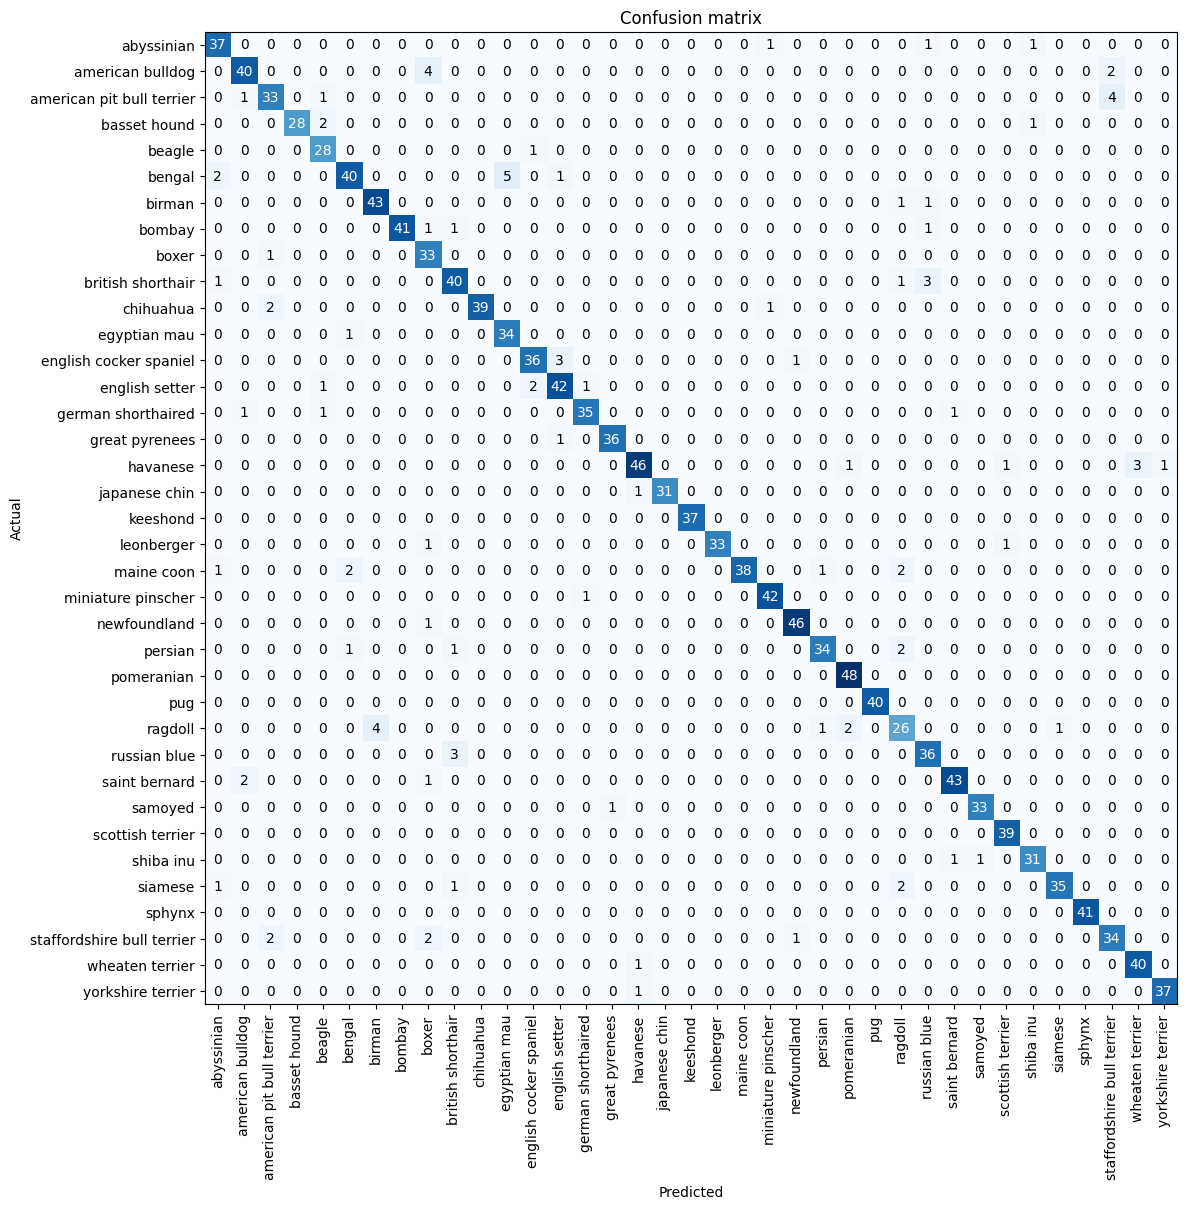

In [95]:
interp3 = ClassificationInterpretation.from_learner(learn3)
interp3.plot_confusion_matrix(figsize=(12, 12))

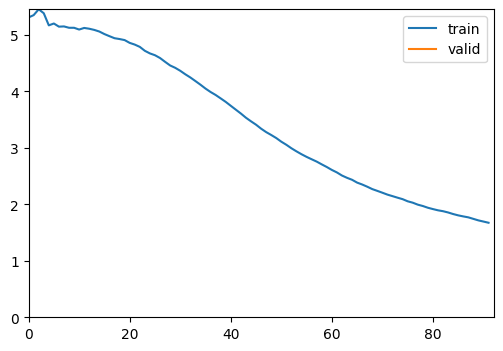

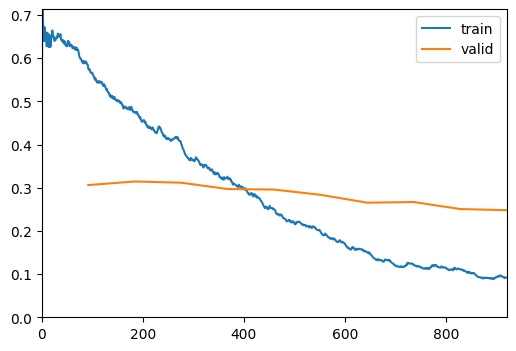

In [96]:
#lr = 0.01
learn4 = vision_learner(dls, resnet18, metrics=error_rate, cbs=ShowGraphCallback(),lr=1e-2)
learn4.fine_tune(10)

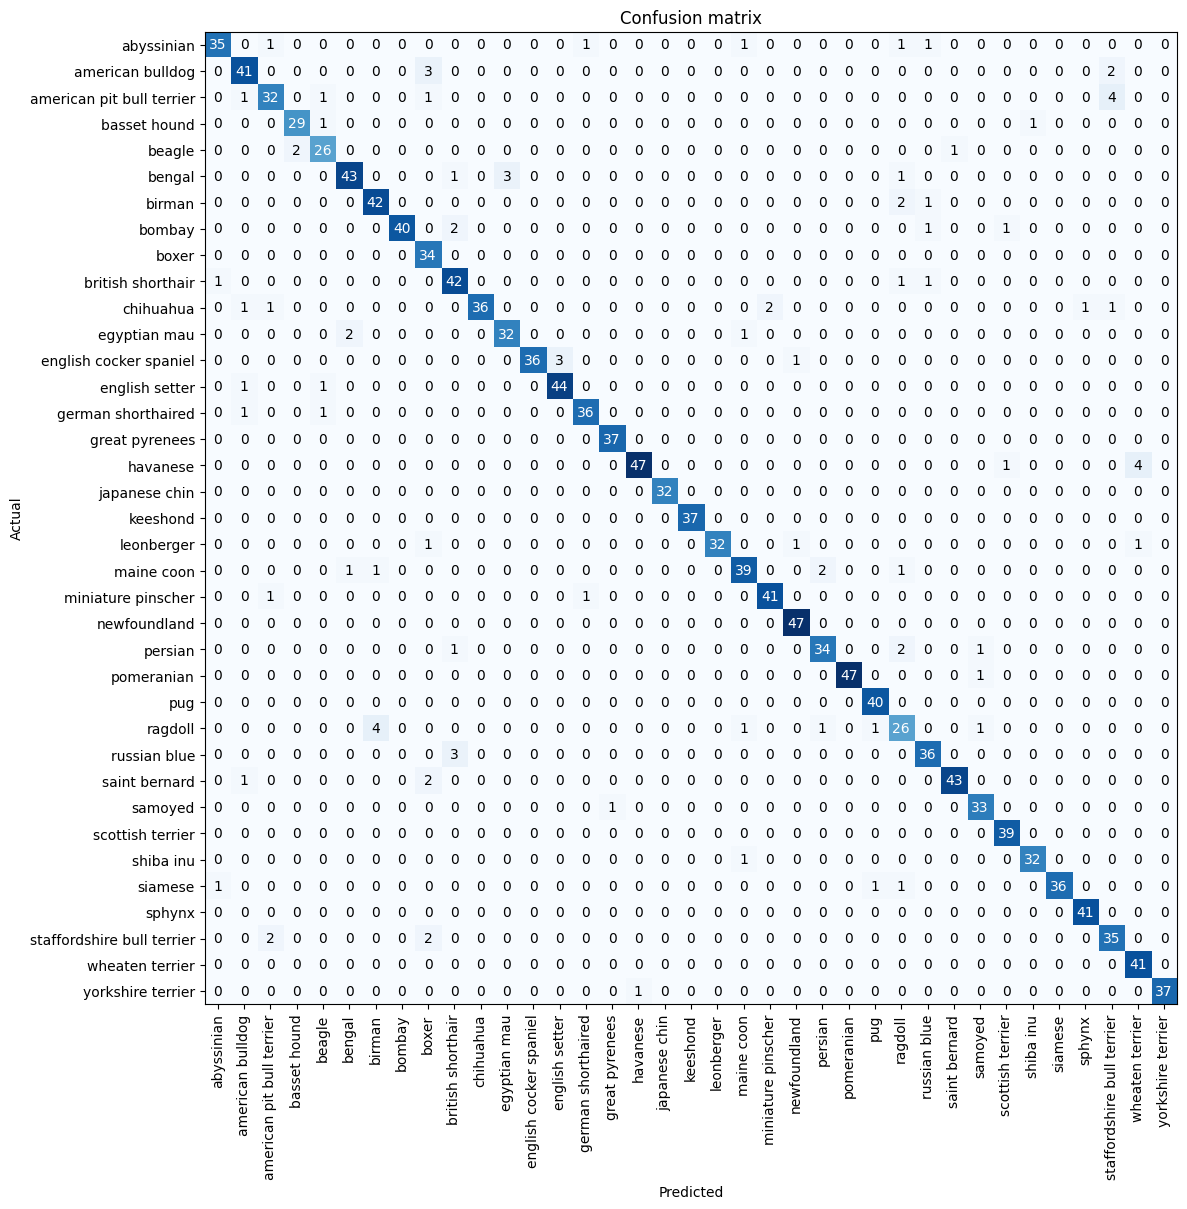

In [97]:
interp4 = ClassificationInterpretation.from_learner(learn4)
interp4.plot_confusion_matrix(figsize=(12, 12))

Learning rate does not really make a difference, so we can save default lr itself.

In [23]:
learn.export('model.pkl')

In [24]:
learn.validate()

(#2) [0.22730512917041779,0.07510148733854294]

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp

In [26]:
??interp

Type:        ClassificationInterpretation
String form: <fastai.interpret.ClassificationInterpretation object at 0x7c455f793310>
File:        /opt/conda/lib/python3.10/site-packages/fastai/interpret.py
Source:     
class ClassificationInterpretation(Interpretation):
    "Interpretation methods for classification models."

    def __init__(self, 
        learn:Learner, 
        dl:DataLoader, # `DataLoader` to run inference over
        losses:TensorBase, # Losses calculated from `dl`
        act=None # Activation function for prediction
    ):
        super().__init__(learn, dl, losses, act)
        self.vocab = self.dl.vocab
        if is_listy(self.vocab): self.vocab = self.vocab[-1]

    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`."
        x = torch.arange(0, len(self.vocab))
        _,targs,decoded = self.learn.get_preds(dl=self.dl, with_decoded=True, with_preds=True, 
                                               with_targs=True, act=self.act)
       

In [27]:
interp.print_classification_report()

                            precision    recall  f1-score   support

                abyssinian       0.97      0.86      0.91        35
          american bulldog       0.75      0.97      0.85        37
 american pit bull terrier       0.81      0.66      0.72        38
              basset hound       0.93      0.93      0.93        41
                    beagle       0.91      0.91      0.91        34
                    bengal       0.89      0.87      0.88        39
                    birman       0.88      0.90      0.89        39
                    bombay       0.95      0.97      0.96        37
                     boxer       0.86      0.94      0.90        34
         british shorthair       0.84      0.89      0.86        35
                 chihuahua       0.98      0.85      0.91        52
              egyptian mau       0.86      0.97      0.92        39
    english cocker spaniel       0.95      0.95      0.95        38
            english setter       0.98      0.98